<a href="https://colab.research.google.com/github/silviobarretto/modelo-regressao-mkt/blob/main/Modelo%20Regressao%20Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **Contexto - Introdução**

Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

Para **entender** melhor **a relação entre as variáveis** presentes nesses registros e **identificar os fatores que mais impactam** na geração de leads, a empresa solicitou a análise de um especialista em dados. **Além disso, a empresa busca criar um modelo de predição** de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

## Sobre os dados

A tabela contém informações dos investimentos feitos pelo youtube, facebook, newspaper e também a quantidade de cada.


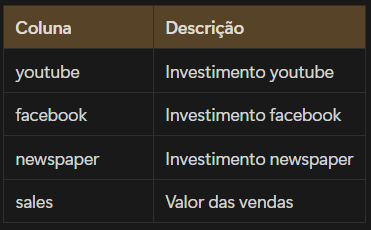

In [ ]:
# Importando o Dataset
data = pd.read_csv('MKT.csv')

In [ ]:
# Consultando a tabela
data.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Verificando os tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# Consultando os dados únicos
data.nunique()

,0
youtube,165
facebook,145
newspaper,148
sales,112


In [ ]:
# Consultando se existe dados duplicados
data.duplicated().to_dict()

{0: False,
 1: False,
 2: False,
 3: False,
 4: False,
 5: False,
 6: False,
 7: False,
 8: False,
 9: False,
 10: False,
 11: False,
 12: False,
 13: False,
 14: False,
 15: False,
 16: False,
 17: False,
 18: False,
 19: False,
 20: False,
 21: False,
 22: False,
 23: False,
 24: False,
 25: False,
 26: False,
 27: False,
 28: False,
 29: False,
 30: False,
 31: False,
 32: False,
 33: False,
 34: False,
 35: False,
 36: False,
 37: False,
 38: False,
 39: False,
 40: False,
 41: False,
 42: False,
 43: False,
 44: False,
 45: False,
 46: False,
 47: False,
 48: False,
 49: False,
 50: False,
 51: False,
 52: False,
 53: False,
 54: False,
 55: False,
 56: False,
 57: False,
 58: False,
 59: False,
 60: False,
 61: False,
 62: False,
 63: False,
 64: False,
 65: False,
 66: False,
 67: False,
 68: False,
 69: False,
 70: False,
 71: False,
 72: False,
 73: False,
 74: False,
 75: False,
 76: False,
 77: False,
 78: False,
 79: False,
 80: False,
 81: False,
 82: False,
 83: False,
 8

In [ ]:
# Consultando valores nulos
print(data.isnull().sum())

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64


# Boxplot para Análise de Distribuições

## Descrição
Este código gera boxplots para visualizar a distribuição das variáveis em um conjunto de dados. Os boxplots são uma ferramenta poderosa na análise exploratória de dados, pois permitem identificar a mediana, os quartis e possíveis outliers nas variáveis, fornecendo uma visão clara da sua dispersão e centralidade.

## Objetivos

*   Visualizar a Dispersão dos Dados: Criar boxplots para cada variável do conjunto de dados, permitindo uma rápida visualização da distribuição e dos outliers.
*   Identificar Outliers: Os boxplots facilitam a identificação de valores atípicos que podem influenciar análises subsequentes.
*   Comparar Variáveis: A visualização em boxplots permite comparar rapidamente a distribuição entre diferentes variáveis.



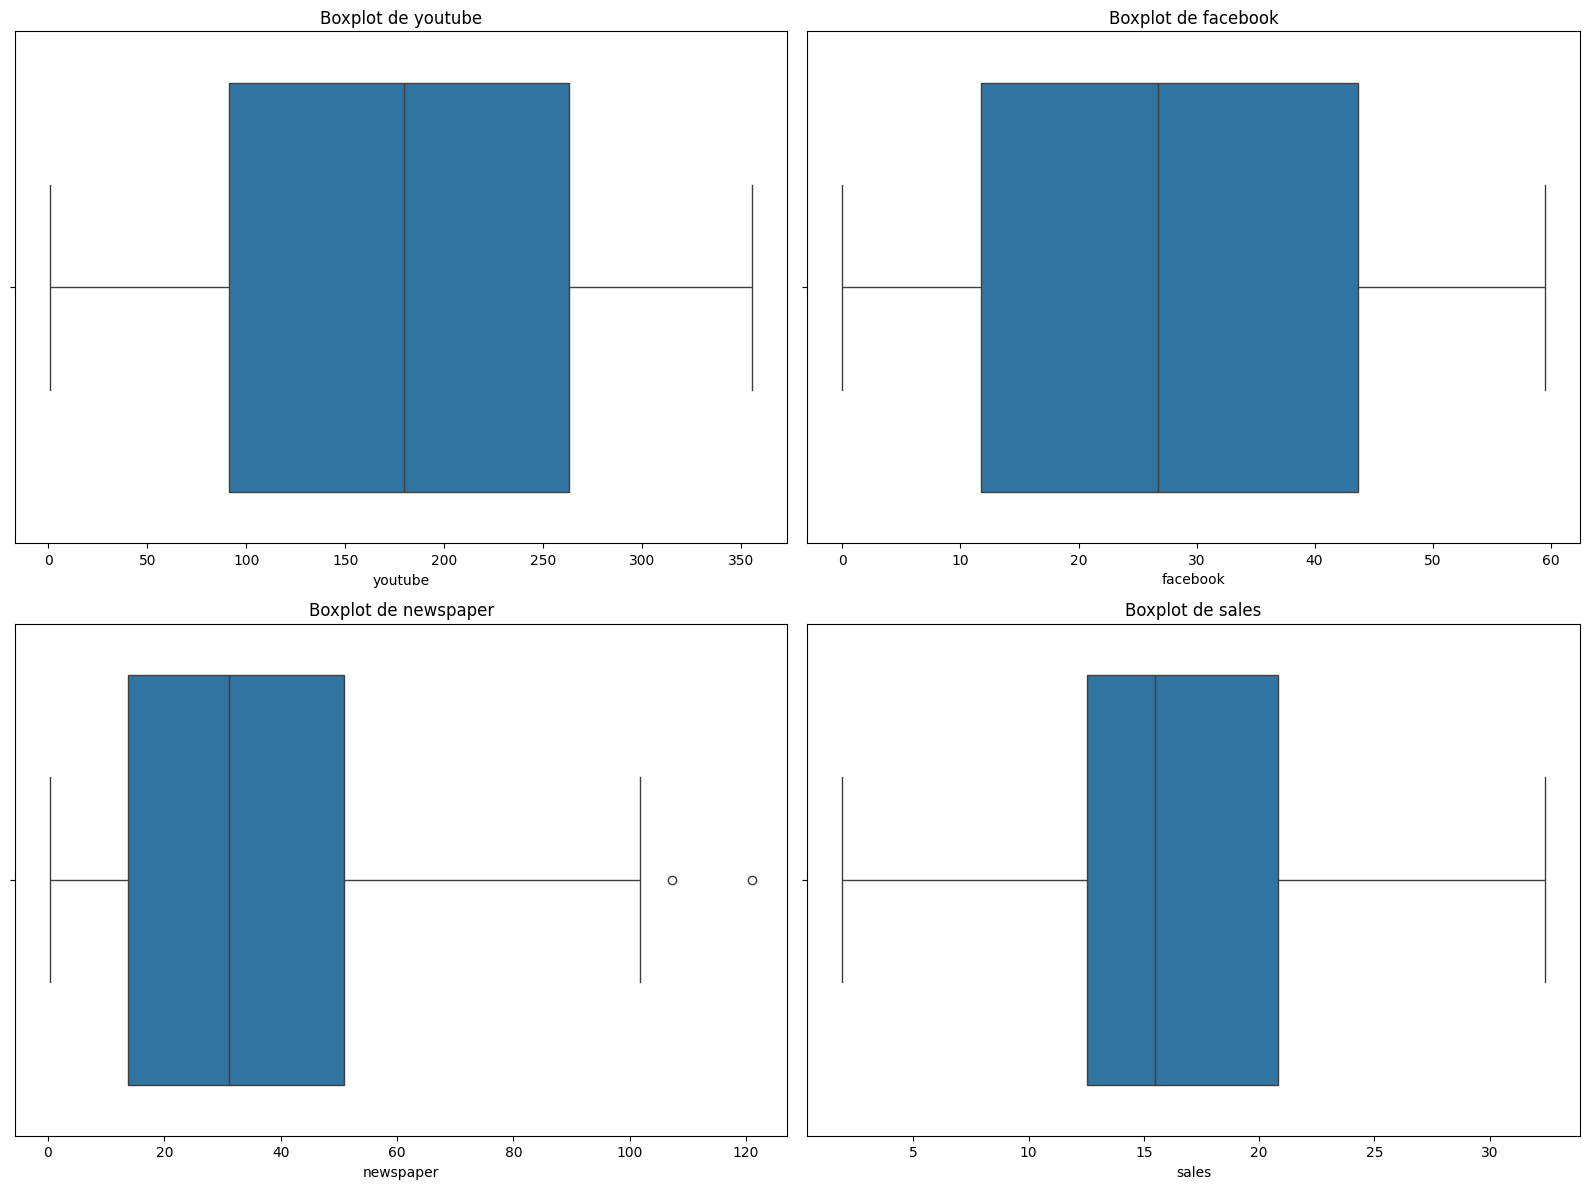

In [ ]:
# Visualizar as distribuições das variáveis
columns = data.columns
plt.figure(figsize=(16, 12))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

# Histograma para Verificar Distribuições

## Descrição
Este código gera histogramas para visualizar a distribuição de variáveis em um conjunto de dados. A visualização das distribuições é uma etapa importante na análise exploratória de dados, pois permite identificar padrões, tendências e possíveis anomalias nos dados.

## Objetivos

*   Visualizar Distribuições: Criar histogramas para cada variável do conjunto de dados, permitindo uma compreensão visual das distribuições.
*   Identificar Tendências: Através dos histogramas, é possível observar a forma das distribuições (normal, assimétrica, etc.) e identificar a presença de outliers.
*   Aprimorar Análise: As visualizações ajudam a informar decisões sobre pré-processamento e modelagem subsequente.





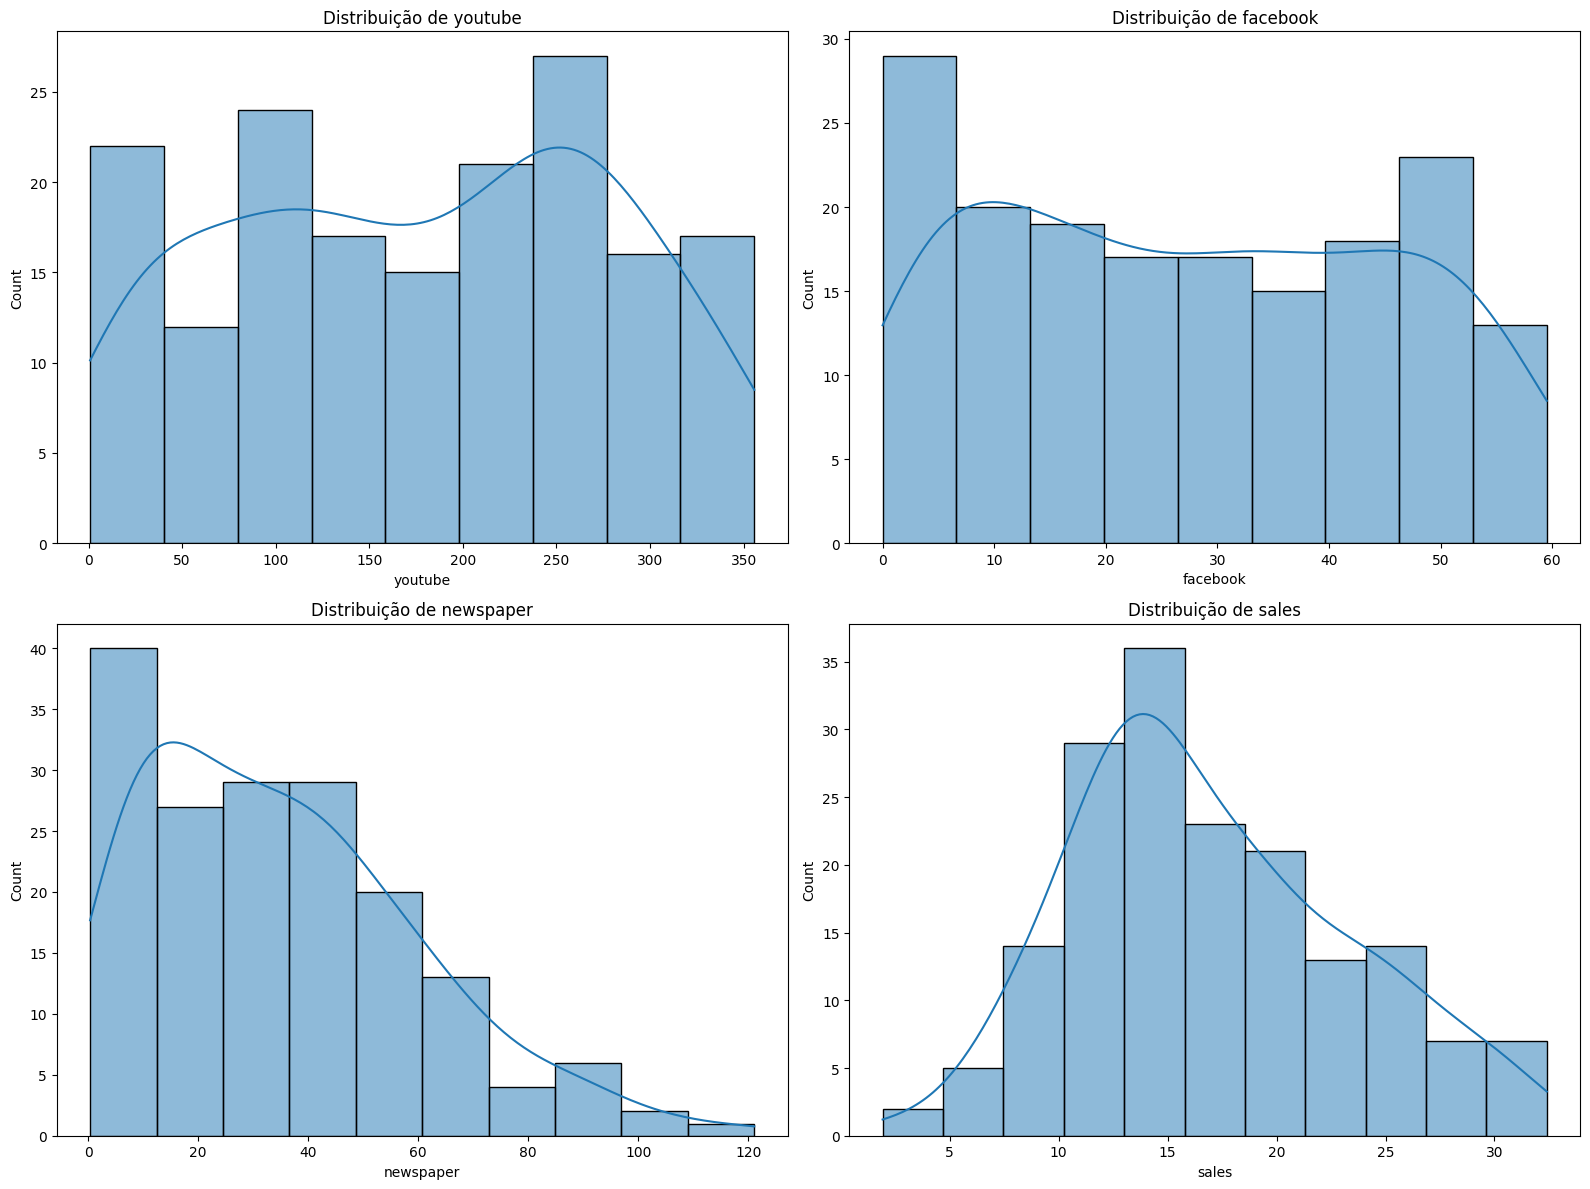

In [ ]:
# Histograma para verificar distribuições
plt.figure(figsize=(16, 12))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribuição de {column}")

plt.tight_layout()
plt.show()

In [ ]:
data.keys()

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

# Modelagem

## Objetivos da Modelagem:

Construir um Modelo de Regressão: O principal objetivo é desenvolver um modelo que relacione os investimentos em diferentes canais de marketing (YouTube, Facebook e Newspaper) com as vendas resultantes.

Aproveitar Dados Disponíveis: Utilizar o conjunto de dados fornecido para treinar o modelo e garantir que ele reflita com precisão as relações entre as variáveis.

In [ ]:
# Separarando as variáveis independentes (X) e dependente (y)
X = data[['youtube', 'facebook', 'newspaper']]
y = data['sales']

In [ ]:
 #Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

In [ ]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Erro Quadrático Médio: {mse}')
print(f'Pontuação r2: {r2}')

Erro Quadrático Médio: 5.576790234026713
Pontuação r2: 0.872863085701216


# Comparação entre Vendas Reais e Previstas

## Descrição
Este código gera um gráfico de dispersão (scatter plot) para comparar as vendas reais com as vendas previstas por um modelo de regressão. A visualização permite avaliar a precisão do modelo, identificando como as previsões se alinham com os valores reais, além de destacar a presença de possíveis desvios.

## Objetivos


*   Comparar Vendas Reais e Previstas: O gráfico ajuda a visualizar a relação entre as vendas reais (observadas) e as vendas previstas pelo modelo, facilitando a avaliação da performance do modelo.
*   Identificar Tendências e Erros: Através da comparação visual, é possível identificar padrões de erro, como subestimações ou superestimações nas previsões.
*   Visualizar a Linha de Igualdade: A linha vermelha adicionada ao gráfico serve como referência, indicando onde as previsões seriam perfeitas (vendas previstas iguais às vendas reais).






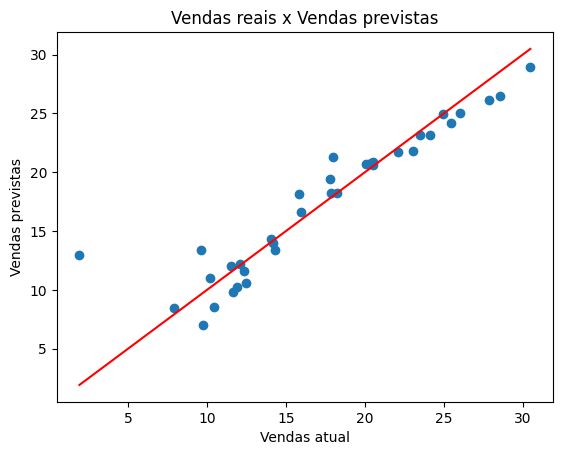

In [ ]:
# Visualizando os resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Vendas atual')
plt.ylabel('Vendas previstas')
plt.title('Vendas reais x Vendas previstas')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

# Calculando predição

## Exemplo Prático
Para ilustrar a aplicação do modelo, considere um cenário onde a empresa decide investir:


*   YouTube: 200
*   Facebook: 30
*   Newspaper: 50

Ao inserir esses valores na função de predição, o modelo calculará as vendas esperadas com base nos dados históricos e no aprendizado do modelo.


In [ ]:
def predict_sales(youtube_investment, facebook_investment, newspaper_investment):
  new_data = pd.DataFrame({
        'youtube': [youtube_investment],
        'facebook': [facebook_investment],
        'newspaper': [newspaper_investment]
    })
  predicted_sales = model.predict(new_data)
  return predicted_sales[0]

In [ ]:
youtube_investment = 200
facebook_investment = 30
newspaper_investment = 50

In [ ]:
predicted_sales = predict_sales(youtube_investment, facebook_investment, newspaper_investment)

In [ ]:
print(f'Vendas previstas para investimentos - YouTube: {youtube_investment}, Facebook: {facebook_investment}, Newspaper: {newspaper_investment} é: {predicted_sales:.2f}')

Vendas previstas para investimentos - YouTube: 200, Facebook: 30, Newspaper: 50 é: 18.37
